In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('clone/machine-learning-zoomcamp/02-regression/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='median_house_value', ylabel='Count'>

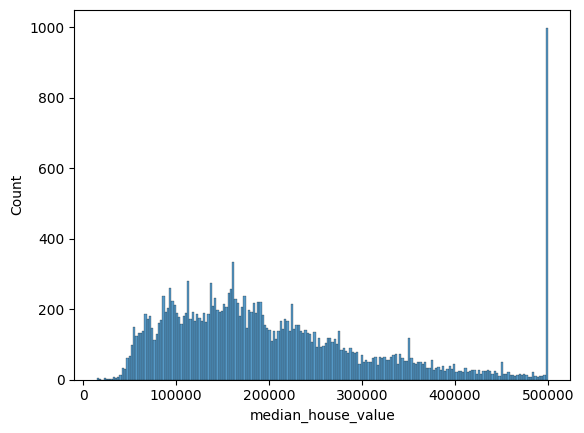

In [6]:
sns.histplot(df.median_house_value, bins=200)

In [7]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
df_filt=df[(df.ocean_proximity=='<1H OCEAN') | (df.ocean_proximity=='INLAND')]

In [9]:
df_filt=df_filt[['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']]

In [10]:
df_filt.population.mean()

1466.3172053292535

In [11]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [12]:
df_filt.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [13]:
n = len(df_filt)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
def seeds(sd, n, df_filt):        
    np.random.seed(sd)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_train = df_filt.iloc[idx[:n_train]]
    df_val = df_filt.iloc[idx[n_train:n_train+n_val]]
    df_test = df_filt.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return df_train, df_val, df_test, y_train, y_val, y_test

In [18]:
df_train, df_val, df_test, y_train, y_val, y_test=seeds(42, n, df_filt)
df_train.total_bedrooms.mean()

542.552956325786

In [19]:
df_train.total_bedrooms.fillna(542.552).mean()

542.5529467757356

In [20]:
df_train_m=df_train.copy()
df_train_m.total_bedrooms.fillna(542.552, inplace=True)

In [21]:
df_train_m.total_bedrooms.mean()

542.5529467757356

In [22]:
df_train_0=df_train.copy()
df_train_0.total_bedrooms.fillna(0, inplace=True)

In [23]:
df_train_0.total_bedrooms.mean()

537.1349197917773

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [25]:
w0, w = train_linear_regression(df_train_m, y_train)

y_pred = w0 + df_val.dot(w)

In [26]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [27]:
score =rmse(y_val, y_pred)
round(score,2)

0.34

In [28]:
w0, w = train_linear_regression(df_train_0, y_train)

y_pred = w0 + df_val.dot(w)
score =rmse(y_val, y_pred)
round(score,2)

0.34

In [29]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(df_train_0, y_train, r=r)
    y_pred = w0 + df_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0 -9.763249477706538 0.34
1e-06 -9.763228830791899 0.34
0.0001 -9.761185235494285 0.34
0.001 -9.742646249284952 0.34
0.01 -9.561056192444804 0.34
0.1 -8.058889769110046 0.34
1 -3.1331542783334467 0.34
5 -0.8410867975419856 0.35
10 -0.43811723163266875 0.35


In [31]:
scores=[]
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test=seeds(s, n, df_filt)
    df_train_0=df_train.copy()
    df_train_0.total_bedrooms.fillna(0, inplace=True)
    w0, w = train_linear_regression(df_train_0, y_train)
    y_pred = w0 + df_val.dot(w)
    scores.append( rmse(y_val, y_pred))
print(round(np.std(scores),3))

0.005


In [32]:
df_train, df_val, df_test, y_train, y_val, y_test=seeds(9, n, df_filt)
df_full_train = pd.concat([df_train, df_val])
df_train_0=df_full_train.copy()
df_train_0.total_bedrooms.fillna(0, inplace=True)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(df_train_0, y_full_train, r=0.001)
y_pred = w0 + df_test.dot(w)
score = rmse(y_test, y_pred)
print(r, w0, round(score,2))
   

10 -9.72483921739169 0.33
